In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import matplotlib.pyplot as plt

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [19]:
house = pd.read_csv("house train.csv")
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [20]:
house.corr().tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057,0.008,0.206,0.078,0.065,-0.002,0.005,0.006,0.012,0.140,...,0.073,0.061,0.054,-0.008,0.051,1.000,0.030,-0.034,-0.060,0.092
MiscVal,-0.006,-0.008,0.003,0.038,-0.031,0.069,-0.034,-0.010,-0.030,0.004,...,-0.010,-0.019,0.018,0.000,0.032,0.030,1.000,-0.006,0.005,-0.021
MoSold,0.021,-0.014,0.011,0.001,0.071,-0.004,0.012,0.021,-0.006,-0.016,...,0.021,0.071,-0.029,0.029,0.023,-0.034,-0.006,1.000,-0.146,0.046
YrSold,0.001,-0.021,0.007,-0.014,-0.027,0.044,-0.014,0.036,-0.008,0.014,...,0.022,-0.058,-0.010,0.019,0.011,-0.060,0.005,-0.146,1.000,-0.029
SalePrice,-0.022,-0.084,0.352,0.264,0.791,-0.078,0.523,0.507,0.477,0.386,...,0.324,0.316,-0.129,0.045,0.111,0.092,-0.021,0.046,-0.029,1.000


In [21]:
house["OverallQual"].isnull().values.any()

False

In [22]:
house["YearBuilt"].isnull().values.any()

False

In [30]:
# Y is the target variable
Y = house['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house[['OverallQual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [45435.8025931]

Intercept: 
 -96206.07951476044


In [31]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 13 Jul 2020   Prob (F-statistic):          2.19e-313
Time:                        10:13:05   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

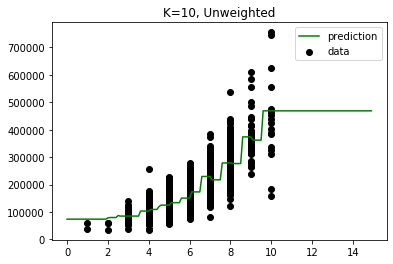

In [32]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(house.OverallQual)
Y = house.SalePrice
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 15, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

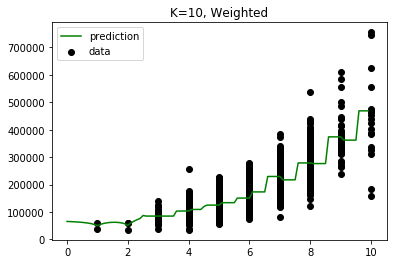

In [33]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(house.OverallQual)
Y = house.SalePrice
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.65 (+/- 0.06)
Weighted Accuracy: 0.65 (+/- 0.06)


In [35]:
# As mentioned in the course the test statistic given by this model is  R2, which measures the same as in linear regression.
# So we see the similar results